In [1]:
#-*- coding: utf-8 -*-
from PIL import Image
import cv2
import time
import numpy as np
import keras.models
import pytesseract
import matplotlib.pyplot as plt
import digit_detector.region_proposal as rp
import digit_detector.show as show
import digit_detector.detect as detector
import digit_detector.file_io as file_io
import digit_detector.preprocess as preproc
import digit_detector.classify as cls

Using TensorFlow backend.


In [2]:
detect_model = "C:/Users/shing/project/model/digit-detector/detector_model.hdf5"
recognize_model = "C:/Users/shing/project/model/digit-detector/recognize_model.hdf5"

mean_value_for_detector = 107.524
mean_value_for_recognizer = 112.833

model_input_shape = (32,32,1)
#DIR = '../datasets/svhn/train'

In [3]:
# 1. image files
#img_files = file_io.list_files(directory=DIR, pattern="*.png", recursive_option=False, n_files_to_sample=None, random_order=False)

preproc_for_detector = preproc.GrayImgPreprocessor(mean_value_for_detector)
preproc_for_recognizer = preproc.GrayImgPreprocessor(mean_value_for_recognizer)

char_detector = cls.CnnClassifier(detect_model, preproc_for_detector, model_input_shape)
char_recognizer = cls.CnnClassifier(recognize_model, preproc_for_recognizer, model_input_shape)

digit_spotter = detector.DigitSpotter(char_detector, char_recognizer, rp.MserRegionProposer())


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\shing\Anaconda3\envs\game\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_1", activity_regularizer=None, trainable=True, input_dtype="float32", batch_input_shape=[None, 32,..., activation="linear", kernel_size=(3, 3), filters=32, strides=[1, 1], padding="valid", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=None, bias_constraint=None, use_bias=True)`
  return cls(**config)
C:\Users\shing\Anaconda3\envs\game\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_2", activity_regularizer=None, trainable=True, activation="linear", kernel_size=(3, 3), filters=32, strides=[1, 1], padding="valid", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=N

Instructions for updating:
Use tf.cast instead.


C:\Users\shing\Anaconda3\envs\game\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_1", activity_regularizer=None, trainable=True, input_dtype="float32", batch_input_shape=[None, 32,..., activation="linear", kernel_size=(3, 3), filters=64, strides=[1, 1], padding="valid", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=None, bias_constraint=None, use_bias=True)`
  return cls(**config)
C:\Users\shing\Anaconda3\envs\game\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_2", activity_regularizer=None, trainable=True, activation="linear", kernel_size=(3, 3), filters=64, strides=[1, 1], padding="valid", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=N

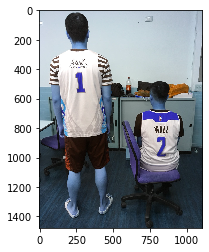

In [4]:
test_image = cv2.imread("C:/Users/shing/Desktop/5.jpg") 
plt.imshow(test_image)

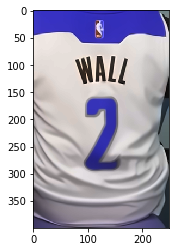

In [5]:
part_img =test_image[700:1100,700:950]
img = np.array(cv2.fastNlMeansDenoisingColored(part_img, None, 10, 10, 7, 21))
plt.imshow(img)

In [7]:
#for img_file in img_files[0:]:
    # 2. image
#img = cv2.imread(img_file)

digit_spotter.run(test_image, threshold=0.5, do_nms=True, show_result=True, nms_threshold=0.1)

1